# Customer Churn Prediction

In [1]:
# Python libraries for data analysis
import numpy as np 
import pandas as pd 

# adjust pandas display settings
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 100)

# Visualization libraries
import matplotlib.pyplot as plt 
# Plotting Style
plt.style.use('Solarize_Light2')

# visualization libraries
import matplotlib.pyplot as plt

# Plotting Style
plt.style.use('Solarize_Light2')

# Set the default figure size
plt.rcParams["figure.figsize"] = (10, 6)

import seaborn as sns

import cufflinks as cf
cf.go_offline()

# random state
rdm_st =123

# palette
palette='Set2'

In [2]:
# Helper Functions

def count_plot(cols:list, nrows:int, ncols:int, df:pd.DataFrame, hue:str='Churn', palette:str='Set2') -> 'sns countplot':
    fig, axs = plt.subplots(nrows, ncols, figsize=(15, 7))

    for idx, col in enumerate(cols):
        if nrows == 1:
            ax = axs[idx]
            sns.countplot(data=data1, x=col, hue=targ, ax=ax, palette=palette)
            ax.set_title(f"Bar Plot of {col}", size=15, color='red')
            
        else:   # if nrows > 1
            ax = axs[idx // ncols, idx % ncols]
            sns.countplot(data=data1, x=col, hue=targ, ax=ax, palette=palette)
            ax.set_title(f"Bar Plot of {col}", size=15, color='red')
            
            
        # Annotate the plots
        for bar in ax.patches:
            x_val = bar.get_x() + bar.get_width() / 2       # x pos
            y_val = bar.get_height()                        # y pos
            ax.annotate(text=y_val,                         # text pos
                        xy=(x_val, y_val),                  # (x, y)
                        xytext=(0, 6),                      # text position
                        ha='center',                        # horizontal alignment
                        va='center',                        # vertical alignment
                        size=12,                            # text size
                        textcoords='offset points')         # text coordinates???

    fig.tight_layout()
    plt.show()


    
def annotated_barplot(col:str, targ:str, df:pd.DataFrame, palette:str='Set2') -> 'boxplot':
    
    a = df.groupby(col)[targ].value_counts(normalize=True)  # convert the value counts of the groupby to fraction between 0 and 1
    a = a.mul(100)   # convert to percentage
    a = a.rename('Percent').reset_index()  # rename the column and reset the index
    
    # make plot
    nrows, ncols = 1, 1
    fig, ax = plt.subplots(nrows, ncols, figsize=(10, 5))
    ax = sns.barplot(x=col, y='Percent', hue=targ, data=a, palette=palette)
    ax.set_title(f"Bar Plot of {col} Showing Customers That Churned", size=15, weight='bold')
    
    # Annotate the plots
    for bar in ax.patches:
        x_val = bar.get_x() + bar.get_width() / 2       # x pos
        y_val = bar.get_height()                        # y pos
        ax.annotate(text=f"{round(y_val, 1)}%",         # text pos
                    xy=(x_val, y_val),                  # (x, y)
                    xytext=(0, 6),                      # text position
                    ha='center',                        # horizontal alignment
                    va='center',                        # vertical alignment
                    size=12,                            # text size
                    textcoords='offset points')         # text coordinates???

    fig.tight_layout()
    plt.show()
    

    
from IPython.display import display_html
from itertools import chain,cycle

def display_side_by_side(*args,titles=cycle([''])):
    """It enables dataframes to be displayed side by side."""
    
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
        
    display_html(html_str,raw=True)
    

In [3]:
# load the data
data = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
# Column names
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Check for NULL values
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data1 = data.copy()

# drop the unnecessary column(s)
data1 = data1.drop(columns=['customerID'])

# convert column nmaes to series
cols = data1.columns.to_series()

# group the column names by datatypes (of the dataframe)
cols.groupby(data1.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

* **From the dict shown above, `TotalCharges` is a Pandas object instead of a numerical datatype**

In [8]:
# 'TotalCharges' contains 'whitespaces'
filter_whitespaces = data1['TotalCharges'].str.contains(r"[\s]")
len(data1.loc[filter_whitespaces, 'TotalCharges'])

11

In [9]:
# replace 'whitespaces' with 'NaN'
data1['TotalCharges'] = np.where(data1['TotalCharges'] == ' ', np.nan, data1['TotalCharges'])

# convert to numerical datatype
data1['TotalCharges'] = data1['TotalCharges'].astype('float')

# drop the 'NaN' values
data1 = data1.dropna()

In [10]:
# target feature
targ = 'Churn'

# characteristics of the customers
cust_feats = ['gender', 'Partner', 'Dependents', 'SeniorCitizen']

# numerical features
num_feats = ['tenure', 'MonthlyCharges', 'TotalCharges']  

# customer transaction history
trn_history = ['Contract', 'tenure', 'MonthlyCharges', 'TotalCharges', 'PaymentMethod', 'PaperlessBilling']

# services oferred by the telecommunication company
telco_feats = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', ]


In [11]:
# descriptive Statistics
data1[num_feats].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### Univariate Analysis

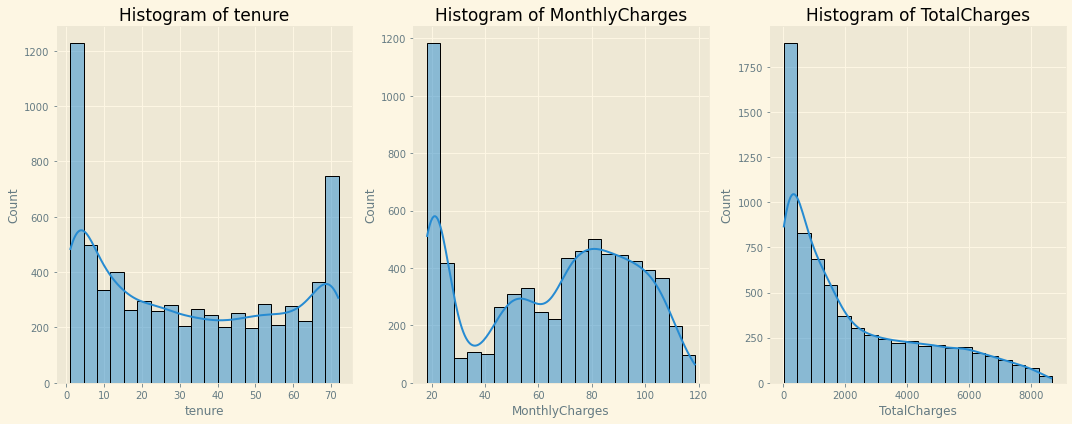

In [12]:
# Histogram of numerical features
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

for idx, col in enumerate(num_feats):
    ax = axs[idx]
    sns.histplot(data=data1, x=col, kde=True, ax=ax, bins=20)
    ax.set_title(f"Histogram of {col}", size=17)
    
fig.tight_layout()
plt.show()

**Comment:**
* It seems that the number of customers with `tenure` < 10 months and `tenure` of about 70 months is very high.
* The distribution of `MonthlyCharges` does not follow a normal distribution. It appears that the `MonthlyCharges` of the customers fall into two categories and this may as a result of the contract type. The first category spend on average about 20 dollars while the secon category speand 80 dollars monthly.
* The distribution of `TotalCharges` follows an exponential distribution.

In [ ]:
# Box plot of the numerical features
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for idx, col in enumerate(num_feats):
    ax = axs[idx]
    sns.boxplot(data=data1, y=col, ax=ax)
    ax.set_title(f"Box Plot of {col}", size=17)
    
fig.tight_layout()
plt.show()

In [ ]:
# Visualize the target
a = data1['Churn'].value_counts()
print(a)
print(f"\n\n\n")

plt.pie(x=a.values, explode=[0.04, 0], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, textprops={'size': 16}, radius=1.3)
plt.title('Pie Chart of Churn Rate', size=18, weight='bold', y=1.05)

plt.show()

**Comment:**
* The **churn rate** is **~27%**

<br>

In [ ]:
# Customer features
for col in cust_feats:
    v = data1[col].value_counts(normalize=True).apply(lambda x: f"{round((x*100), 1)}%")   # round the percentage value counts of each feature
    print(f"{col} \n{v}")
    print("==" * 30)

In [ ]:
# Customer features
count_plot(['Dependents', 'SeniorCitizen'], 1, 2, data1, 'tab10')

<br>

**Comment:**
* `Gender` and `Partner` are fairly balanced features.
* Most customers are Not `Senior Citizens` and also have No `Dependents`.


In [ ]:
# Transaction History features
for col in ['Contract', 'PaymentMethod', 'PaperlessBilling']:
    v = data1[col].value_counts(normalize=True).apply(lambda x: f"{round((x*100), 1)}%")   # round the percentage value counts of each feature
    print(f"{col} \n{v}")
    print("==" * 30)

<br>

**Comment:**
* For the `Contract` type, most customers are on a **Month-to-month** contract.
* **Electronic check** is the most common `PaymentMethod` type.


In [ ]:
# Services oferred by the telecommunication company
for col in telco_feats:
    v = data1[col].value_counts(normalize=True).apply(lambda x: f"{round((x*100), 1)}%")   # round the percentage value counts of each feature
    print(f"{col} \n{v}")
    print("==" * 30)

<br>

* A high percentage of the customers did **NOT** opt for the `Services` provided by the Telecoms Company.

In [ ]:
a = data1['PhoneService'].value_counts()
print(a)
print(f"\n\n\n")

plt.pie(x=a.values, explode=[0.05, 0], labels=['Yes', 'No'], autopct='%1.1f%%', startangle=90, textprops={'size': 16}, radius=1.3)
plt.title('Pie Chart of Phone Service', size=18, weight='bold', y=1.07)

plt.show()

<br>

**Comment:**
* Most customers opted for `PhoneService`.

<br>

### Multivariate Analysis

#### Numerical Features

In [ ]:
data1.pivot_table(index=targ)

# # OR
# df.groupby('Churn').mean()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(17, 6))

for (idx, col) in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    ax = axs[idx] 
    sns.histplot(x=col, data=data1, hue=targ, ax=ax, palette='Dark2')
    ax.set_title(f"Histogram of {col}", weight='bold')

fig.tight_layout()
plt.show()

<br>

**Comment:**
* Customers that churned had a shorter `tenure`. The loyal customers had a longer `tenure`.
* `MonthlyCharges`: A lot of customers that churned spent about **70** to **110** dollars monthly while a lot of customers that did not churn spent between **20** to **30** dollars 
* As the `TotalCharges` increases, the count of customers reduces.

<br>


In [ ]:
d = data1[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']] 
sns.pairplot(data=d, hue=targ, diag_kind='hist', height=3, palette=palette)

**Comment:**
* `TotalCharges` is positively correlated with `tenure` and `MonthlyCharges`.

<br>

#### Customer Demography

In [ ]:
data2 = data1.copy()

# Add counter
data2['Count'] = 1

In [ ]:
# a = pd.crosstab(index=data1[targ], columns=data2['gender'], normalize='columns')
# b = pd.crosstab(index=data1[targ], columns=data2['Partner'], normalize='columns')
# c = pd.crosstab(index=data1[targ], columns=data2['SeniorCitizen'], normalize='columns')
d = pd.crosstab(index=data1[targ], columns=data2['SeniorCitizen'], normalize='columns', margins=True)

display_side_by_side(d, titles=['Customer Churn Rate For Dependents'])

**Comment:**
* Customer churn rate is high **(42%)** for customers with `Dependents`.
* The churn rate for other customer demography (Gender, Partner, SeniorCitizen) isn't too high.

<br>

#### Services offered by the Telco

In [ ]:
# Count plot of the Services offered by the Telco
count_plot(telco_feats, 3, 3, data1)

**Comment:**
* It seems the customer churn rate is higher when there are **no additional services** provided by the Telecoms company.
* `InternerService`, `OnlineSecurity`, `OnlineBackup`, and `TechSupport` will be further explored.

In [ ]:
a = pd.crosstab(index=data1[targ], columns=data2['InternetService'], values=data2['Count'], aggfunc=np.sum, margins=True)
a = a / a.loc['All']

b = pd.crosstab(index=data1[targ], columns=data2['OnlineSecurity'], normalize='columns')
c = pd.crosstab(index=data1[targ], columns=data2['OnlineBackup'], normalize='columns')
d = pd.crosstab(index=data1[targ], columns=data2['DeviceProtection'], normalize='columns')
e = pd.crosstab(index=data1[targ], columns=data2['TechSupport'], normalize='columns')

print("Frequency Tables")
display_side_by_side(a, b, e, titles=['Customer Churn Rate For InternetService', 'Customer Churn Rate For OnlineSecurity', 'Customer Churn Rate For TechSupport'])

In [ ]:
annotated_barplot('InternetService', targ, data2)

**Comment:**
* About 42% of customers using **Fiber optic** `InternetService` churned. This is a pretty high percentage.
* 42% of customers using **No** `OnlineSecurity`, `TechSupport` also churned.

<br>

#### Customer transaction history

In [ ]:
count_plot(['Contract', 'PaymentMethod', 'PaperlessBilling'], 1, 3, data2, targ)

In [ ]:
# Let's explore 'PaymentMethod' further
pd.crosstab(index=data1[targ], columns=data2['PaymentMethod'], normalize='columns')

In [ ]:
annotated_barplot('PaymentMethod', targ, data2)

**Comment:**
* A high pecentage **(45%)** of customers that made payment using **Electronic check** churned.

<br>

### Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data3 = data1.copy()

le = LabelEncoder()

for col, dtype in zip(data3.columns, data3.dtypes):
    if dtype == 'O':
        # fit
        le.fit(data3[col])
        
        # transform
        data3[col] = le.transform(data3[col])
        
data3.info()

In [ ]:
# Determine the features that are most correlated with the target
pos_corr = data3.corr()[targ].sort_values(ascending=False)[:5]
neg_corr = data3.corr()[targ].sort_values(ascending=True)[:3]

# correlated features
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].barh(y=pos_corr.index, width=pos_corr.values) 
axs[0].set_xlabel('Correlation with Churn')
axs[0].set_title('Positively Correlated Features', size=15)

axs[1].barh(y=neg_corr.index, width=neg_corr.values) 
axs[1].set_xlabel('Correlation with Churn')
axs[1].set_title('Negatively Correlated Features', size=15)

fig.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(25, 15))
mask = np.triu(data3.corr())

sns.heatmap(data=data3.corr(), mask=mask, annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# random_state
rdm_st = 123

X = data3.drop(columns=[targ])
y = data3[targ]

# features = X.columns

In [ ]:
my_scaler = StandardScaler()
X_scaled = my_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=rdm_st)

In [ ]:
# models
models = {
    'log_model': LogisticRegression(random_state=rdm_st),
    'nb_model': GaussianNB(),
    'rf_model': RandomForestClassifier(random_state=rdm_st),
    'svc': SVC(random_state=rdm_st),
    'ada_boost': AdaBoostClassifier(random_state=rdm_st),
    'gr_boost': GradientBoostingClassifier(random_state=rdm_st),
    'xgb': XGBClassifier(n_estimators=5 , use_label_encoder=False, random_state=rdm_st),
}

In [ ]:
for name, estimator in models.items():
    # fit 
    estimator.fit(X_train, y_train)
    
    # make predictions
    pred = estimator.predict(X_test)
    clf_report = classification_report(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)
    
    print(f"Estimator: {name}: \n Classification Report: \n{clf_report} \nConfusion Matrix: \n{conf_matrix} \n")
    print("==" * 30)

### Model Tuning 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

In [ ]:
rf_params = dict(n_estimators=np.arange(10, 160, 20), min_samples_leaf=np.arange(1, 15, 2))

In [ ]:
rf = RandomForestClassifier(random_state=rdm_st)
rf_rdm_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, random_state=rdm_st, scoring='f1')

In [ ]:
# fit 
rf_rdm_search.fit(X_train, y_train)

# best parameters
rf_rdm_search.best_params_

In [ ]:
models1 = {
    'rf_model': RandomForestClassifier(n_estimators=50, min_samples_leaf=13, random_state=rdm_st),
#     'svc': SVC(C = 9.77, gamma = 0.16, random_state=rdm_st),
}

In [ ]:
for name, estimator in models1.items():
    # fit 
    estimator.fit(X_train, y_train)
    
    # make predictions
    pred = estimator.predict(X_test)
    clf_report = classification_report(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)
    
    print(f"Estimator: {name}: \n Classification Report: \n{clf_report} \nConfusion Matrix: \n{conf_matrix} \n")
    print("==" * 30)